In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
# Set working directory
os.chdir("C:/Users/Navin Kumar/Desktop/DS/Project 2/")

In [3]:
# import the csv file
df = pd.read_csv("C:/Users/Navin Kumar/Desktop/DS/Project 2/day.csv")

In [4]:
# Shape of dataset
df.shape

(731, 16)

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratry Data Analysis

In [6]:
# Data types
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
# Converting categorical variables to required data format 
df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [8]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Distribution of continuous variables

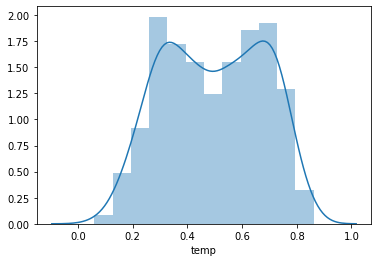

In [9]:
# Normality check of 'temp' variable
sns.distplot(df['temp']);

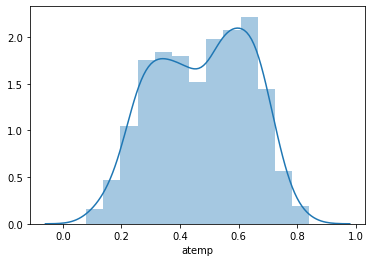

In [10]:
# Normality check of 'atemp' variable
sns.distplot(df['atemp']);

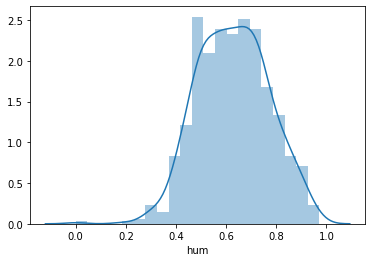

In [11]:
# Normality check of 'hum' variable
sns.distplot(df['hum']);

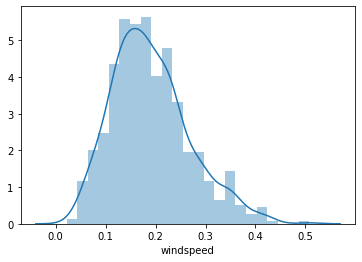

In [12]:
#Normality check of 'windspeed' variable
sns.distplot(df['windspeed']);

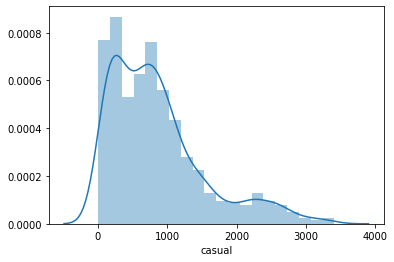

In [13]:
#Normality check of 'casual' variable
sns.distplot(df['casual']);

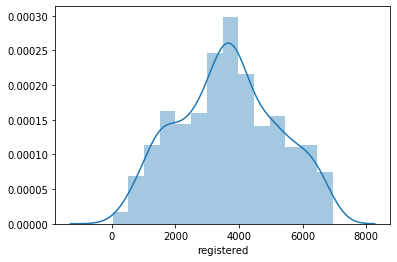

In [14]:
#Normality check of 'registered' variable
sns.distplot(df['registered']);

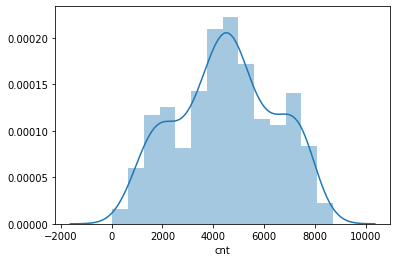

In [15]:
#Normality check of 'cnt' variable
sns.distplot(df['cnt']);

# Missing Value Analysis

In [16]:
#Create dataframe with missing values in dataset
missing_val = pd.DataFrame(df.isnull().sum())

In [17]:
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Outlier Analysis

In [18]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


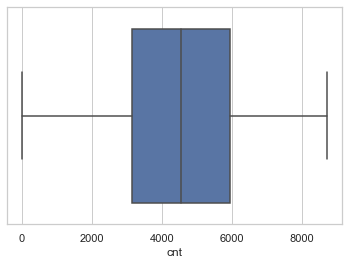

In [19]:
#Plot boxplot to visualize Outliers
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['cnt'],orient ='h')

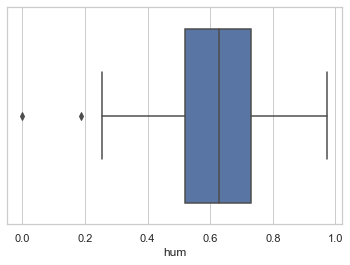

In [20]:
ax = sns.boxplot(x=df['hum'],orient ='h')

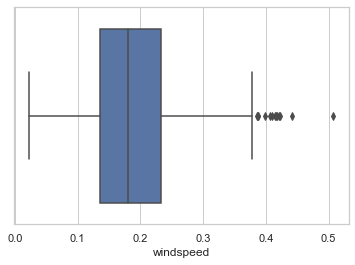

In [21]:
ax = sns.boxplot(x=df['windspeed'],orient ='h')

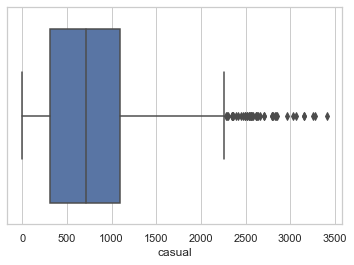

In [22]:
ax = sns.boxplot(x=df['casual'],orient ='h')

In [26]:
#create dataframe for outliers
wind_hum_cas=pd.DataFrame(df,columns=['windspeed','hum', 'casual'])
#column names for outliers                     
cnames=['windspeed','hum', 'casual']

In [27]:
# Detect and delete outliers from train data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(wind_hum_cas[i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
#Replace with NA
wind_hum_cas.loc[wind_hum_cas[i]<min,:i]=np.nan
wind_hum_cas.loc[wind_hum_cas[i]>max,:i]=np.nan  

windspeed
-0.012446750000000034
0.38061125
hum
0.20468725
1.0455212500000002
casual
-855.25
2266.75


In [28]:
#Create dataframe with missing values in train data
missing_val1 = pd.DataFrame(wind_hum_cas.isnull().sum())
missing_val1

,0
windspeed,44
hum,44
casual,44


In [29]:
#Imputating the outliers by mean Imputation
wind_hum_cas['windspeed']=wind_hum_cas['windspeed'].fillna(wind_hum_cas['windspeed'].mean())
wind_hum_cas['hum']=wind_hum_cas['hum'].fillna(wind_hum_cas['hum'].mean())
wind_hum_cas['casual']=wind_hum_cas['casual'].fillna(wind_hum_cas['casual'].mean())

In [30]:
#Replacing the imputated windspeed
df['windspeed']=wind_hum_cas['windspeed']
#Replacing the imputated humidity
df['hum']=wind_hum_cas['hum']
#Replacing the imputated casual
df['casual']=wind_hum_cas['casual']
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518,1600


In [31]:
missing_val2 = pd.DataFrame(df.isnull().sum())
missing_val2

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


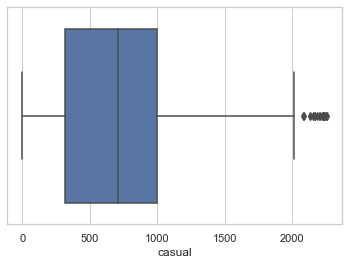

In [32]:
ax = sns.boxplot(x=df['casual'],orient ='h')

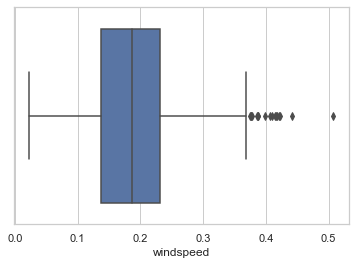

In [33]:
ax = sns.boxplot(x=df['windspeed'],orient ='h')

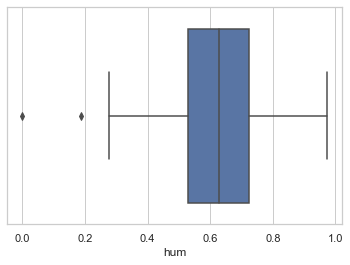

In [34]:
ax = sns.boxplot(x=df['hum'],orient ='h')

# Feature Selection

In [35]:
#Creating dataframe for numerical features
day_num = df.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]

#Correlation matrix between all  numeric variables to find their importance 
day_num.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.13,-0.15,0.58,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.58,0.54,0.63
hum,0.13,0.14,1.0,-0.25,-0.07,-0.078,-0.081
windspeed,-0.15,-0.18,-0.25,1.0,-0.2,-0.22,-0.23
casual,0.58,0.58,-0.07,-0.2,1.0,0.43,0.6
registered,0.54,0.54,-0.078,-0.22,0.43,1.0,0.95
cnt,0.63,0.63,-0.081,-0.23,0.6,0.95,1.0


In [36]:
# Dropping the unwanted columns or Dimension Reduction
df = df.drop(columns=['instant','dteday','atemp','casual','registered'])

In [37]:
df.shape

(731, 11)

In [38]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


#  Convertion of multilevel categorical variable into binary dummy variable

In [39]:
df.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [40]:
df=pd.get_dummies(df)

In [41]:
df.shape

(731, 36)

In [42]:
df.dtypes

temp            float64
hum             float64
windspeed       float64
cnt               int64
season_1          uint8
season_2          uint8
season_3          uint8
season_4          uint8
yr_0              uint8
yr_1              uint8
mnth_1            uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
holiday_0         uint8
holiday_1         uint8
weekday_0         uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
workingday_0      uint8
workingday_1      uint8
weathersit_1      uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object

In [43]:
df['temporary']=df['weathersit_3']
df['weathersit_3']=df['cnt']
df['cnt']=df['temporary']
df = df.drop(columns=['temporary'])
df = df.rename(columns = {'weathersit_3': 'cnt', 'cnt': 'weathersit_3'})

In [44]:
df.head()

,temp,hum,windspeed,weathersit_3,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,cnt
0,0.344167,0.805833,0.160446,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,985
1,0.363478,0.696087,0.248539,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,801
2,0.196364,0.437273,0.248309,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1349
3,0.200000,0.590435,0.160296,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1562
4,0.226957,0.436957,0.186900,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1600


In [45]:
df.shape

(731, 36)

# Sampling Technique

In [46]:
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)

In [47]:
train.shape, test.shape

((584, 36), (147, 36))

# Model Developement
### Linear Regression

In [48]:
df.head()

,temp,hum,windspeed,weathersit_3,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,cnt
0,0.344167,0.805833,0.160446,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,985
1,0.363478,0.696087,0.248539,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,801
2,0.196364,0.437273,0.248309,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1349
3,0.200000,0.590435,0.160296,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,1562
4,0.226957,0.436957,0.186900,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1600


In [49]:
#Import libraries for LR
import statsmodels.api as sm

In [50]:
# Train the model using the training sets
model = sm.OLS(train.iloc[:,35], train.iloc[:,0:35]).fit()

In [51]:
#Check the summary of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          4.37e-209
Time:                        00:38:04   Log-Likelihood:                -4687.0
No. Observations:                 584   AIC:                             9430.
Df Residuals:                     556   BIC:                             9552.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4121.5038    454.178      9.075      0.000    3229.388    5013.619
hum          -1131.5717    320.085     -3.535      0.000   -1760.296    -502.848
windspeed    -2356.9651    459.248     -5.132      0.000   -3259.039   -1454.891
weathersit_3  -889.6434    160.133     -5.556      0.000   -1204.184    -575.103
season_1      -568.6835    126.415     -4.499      0.000    -816.993    -320.374
season_2       280.5512    130.213      2.155      0.032      24.781     536.322
season_3       368.4736    145.333      2.535      0.012      83.004     653.943
season_4      1060.9993    139.760      7.592      0.000     786.476    1335.522
yr_0          -455.8447     76.928     -5.926      0.000    -606.949    -304.740
yr_1          1597.1853     77.196     20.690      0.000    1445.554    1748.816
mnth_1        -249.8402    192.719     -1.296      0.195    -628.386     128.705
mnth_2        -142.4825    179.331     -0.795      0.427    -494.732     209.767
mnth_3         214.3547    134.573      1.593      0.112     -49.979     478.689
mnth_4         280.6514    166.150      1.689      0.092     -45.708     607.011
mnth_5         546.8967    173.777      3.147      0.002     205.558     888.236
mnth_6         356.9654    167.411      2.132      0.033      28.131     685.800
mnth_7        -288.4997    203.621     -1.417      0.157    -688.460     111.461
mnth_8         173.0963    191.607      0.903      0.367    -203.266     549.459
mnth_9         754.7439    155.566      4.852      0.000     449.175    1060.313
mnth_10        278.9403    171.666      1.625      0.105     -58.252     616.133
mnth_11       -364.7918    179.495     -2.032      0.043    -717.362     -12.221
mnth_12       -418.6939    155.506     -2.692      0.007    -724.145    -113.243
holiday_0      899.1357     94.741      9.490      0.000     713.041    1085.230
holiday_1      242.2049    114.744      2.111      0.035      16.820     467.590
weekday_0      -69.6652     67.410     -1.033      0.302    -202.075      62.744
weekday_1       40.9333     78.606      0.521      0.603    -113.468     195.334
weekday_2      165.5068     84.723      1.954      0.051      -0.909     331.923
weekday_3      176.8602     82.615      2.141      0.033      14.584     339.136
weekday_4      214.0108     81.879      2.614      0.009      53.181     374.840
weekday_5      257.9342     80.277      3.213      0.001     100.251     415.617
weekday_6      355.7605     67.764      5.250      0.000     222.655     488.866
workingday_0   528.3002     89.243      5.920      0.000     353.006     703.594
workingday_1   613.0404     63.973      9.583      0.000     487.383     738.698
weathersit_1  1271.2425     74.834     16.987      0.000    1124.250    1418.235
weathersit_2   759.7416     80.998      9.380      0.000     600.642     918.841
=====

In [52]:
lr_pred=model.predict(test.iloc[:,0:35])
lr_pred

430    4266.295662
540    6853.153289
546    7470.017431
23     1021.765965
33     1450.879449
537    7718.681933
11     1001.382107
512    6735.350028
602    6025.978439
578    6956.819326
421    3717.958388
353    3395.220211
478    4214.122607
301     998.416945
601    6698.001867
399    3348.263939
592    6910.317966
435    4298.437551
609    7206.071626
571    6724.460149
412    4139.172469
71     2168.346519
587    6246.025339
396    4759.603009
142    3820.141738
176    4897.545289
696    4482.828597
302    3706.458092
96     3841.137691
406    1192.976661
          ...     
460    6007.852513
306    3803.808087
187    4600.521651
290    4462.762481
127    4287.448376
164    4412.182568
111    2679.805327
678    5707.660554
2      1279.237145
356    1713.894841
670    5258.046488
593    7178.551286
232    4186.824597
347    3049.058858
441    4742.801738
315    3639.318106
584    6537.026668
210    5068.586243
293    4515.856818
446    6155.813589
348    3064.353513
626    5896.

In [53]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [54]:
#Calculate MAPE
MAPE(test.iloc[:,35], lr_pred)

20.659443612467683

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:35], train.iloc[:,35])

In [57]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:35])

In [58]:
MAPE(test.iloc[:,35], predictions_DT)

33.200725365235165

# Random Forest 

In [59]:
#Import library for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [63]:
#Train the model
rf_model = RandomForestRegressor(n_estimators=500,random_state=123).fit(train.iloc[:,0:35], train.iloc[:,35])

In [64]:
#Predict the results of test data
rf_predictions = rf_model.predict(test.iloc[:,0:35])

In [66]:
#Calculate MAPE
MAPE(test.iloc[:,35],rf_predictions)

18.942989113131762